https://kitchingroup.cheme.cmu.edu/blog/2013/02/21/Phase-portraits-of-a-system-of-ODEs/

In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

# Centrum example

Ortho-eigen vals [3. 1.]
Ortho-eigen vecs [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
L =  1.7320508075688772
v =  [[0.70710678]
 [0.35355339]]
w =  [[ 0.        ]
 [-0.61237244]]


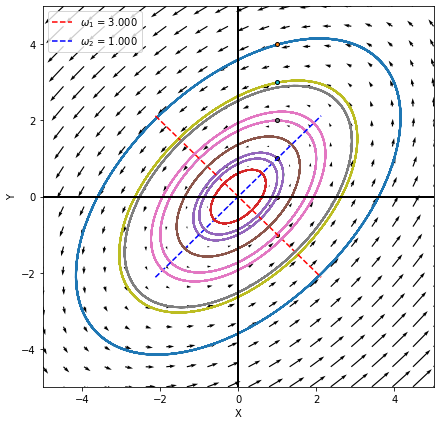

In [2]:
# Set up Jacoby matrix
mtx = np.array([[1, -2],[2,-1]])

P = lambda x,y: mtx[0,0]*x + mtx[0,1]*y
Q = lambda x,y: mtx[1,0]*x + mtx[1,1]*y
fun = lambda p,t: [ P(p[0],p[1]), Q(p[0],p[1]) ]
plt.figure(figsize=(7,7))

# plot few phase trajectories
x0_ = 1.0
tt = np.linspace(0,100, 1000)
for y0_ in [-1,0,1,2,3,4]:
    xy0 = [x0_, y0_]
    zz = odeint(fun, xy0, tt)
    plt.plot(zz[:,0], zz[:,1])
    plt.plot([xy0[0]], [xy0[1]], 'o', mec='k', ms=4)

# visualize the vector field
xx = np.linspace(-5,5,20)
yy = np.linspace(-5,5,20)
Xm,Ym = np.meshgrid(xx,yy)
plt.quiver(Xm,Ym, P(Xm,Ym), Q(Xm,Ym), scale_units='xy', angles='xy')

# visualize eigenvectors of the rotated Jacoby matrix
# ---
rot90 = np.array([[0,1],[-1,0]])
mtx90 = np.dot(rot90, mtx)
vals, vecs = np.linalg.eig(mtx90)
print('Ortho-eigen vals', vals)
print('Ortho-eigen vecs', vecs)

plt.plot([vecs[0,0]*-3, vecs[0,0]*3] , [vecs[1,0]*-3, vecs[1,0]*3], 
             '--r', label='$\omega_1$ = %.3f' % vals[0])
plt.plot([vecs[0,1]*-3, vecs[0,1]*3] , [vecs[1,1]*-3, vecs[1,1]*3], 
             '--b', label='$\omega_2$ = %.3f' % vals[1])


# visualise precise solutions
evals,evecs = np.linalg.eig(mtx)
L = np.imag(evals[0])
v = np.real(evecs[:,0]).reshape((2,1))
w = np.imag(evecs[:,0]).reshape((2,1))
print('L = ', L )
print('v = ', v )
print('w = ', w )

c1_ = 1.0
tt = np.linspace(0,100, 1000)
for c2_ in [-1,0,1,2,3,4]:
    xy0 = [c1_, c2_]
    zz = (c1_*v + c2_*w)*np.cos(L*tt) + (c2_*v - c1_*w)*np.sin(L*tt)
    zz = zz.T
    plt.plot(zz[:,0], zz[:,1])

# decorations
plt.plot([0,0],[-10,10], 'k-', lw=2)
plt.plot([-10,10],[0,0], 'k-', lw=2)
plt.legend()
plt.xlim(-5,5); plt.ylim(-5,5)
plt.xlabel('X'); plt.ylabel('Y')
plt.show()

Ortho-eigen vals [4.0175564 0.5824436]
Ortho-eigen vecs [[ 0.84060955  0.73700565]
 [-0.54164157  0.67588658]]
R =  -0.4500000000000002
L =  1.4620191517213446
v =  [[0.50602557]
 [0.75180941]]
w =  [[0.42275375]
 [0.        ]]


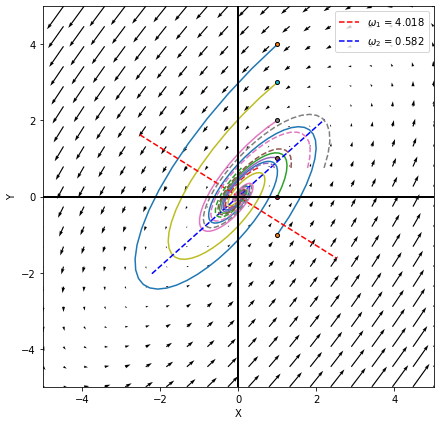

In [3]:
# Set up Jacoby matrix
mtx = np.array([[1.3, -2],[2.6,-2.2]])

P = lambda x,y: mtx[0,0]*x + mtx[0,1]*y
Q = lambda x,y: mtx[1,0]*x + mtx[1,1]*y
fun = lambda p,t: [ P(p[0],p[1]), Q(p[0],p[1]) ]
plt.figure(figsize=(7,7))

# plot few phase trajectories
x0_ = 1.0
tt = np.linspace(0,100, 1000)
for y0_ in [-1,0,1,2,3,4]:
    xy0 = [x0_, y0_]
    zz = odeint(fun, xy0, tt)
    plt.plot(zz[:,0], zz[:,1])
    plt.plot([xy0[0]], [xy0[1]], 'o', mec='k', ms=4)

# visualize the vector field
xx = np.linspace(-5,5,20)
yy = np.linspace(-5,5,20)
Xm,Ym = np.meshgrid(xx,yy)
plt.quiver(Xm,Ym, P(Xm,Ym), Q(Xm,Ym), scale_units='xy', angles='xy')

# visualize eigenvectors of the rotated Jacoby matrix
# ---
rot90 = np.array([[0,1],[-1,0]])
mtx90 = np.dot(rot90, mtx)
vals, vecs = np.linalg.eig(mtx90)
print('Ortho-eigen vals', vals)
print('Ortho-eigen vecs', vecs)

plt.plot([vecs[0,0]*-3, vecs[0,0]*3] , [vecs[1,0]*-3, vecs[1,0]*3], 
             '--r', label='$\omega_1$ = %.3f' % vals[0])
plt.plot([vecs[0,1]*-3, vecs[0,1]*3] , [vecs[1,1]*-3, vecs[1,1]*3], 
             '--b', label='$\omega_2$ = %.3f' % vals[1])


# visualise precise solutions
evals,evecs = np.linalg.eig(mtx)
R = np.real(evals[0])
L = np.imag(evals[0])
v = np.real(evecs[:,0]).reshape((2,1))
w = np.imag(evecs[:,0]).reshape((2,1))
print('R = ', R)
print('L = ', L )
print('v = ', v )
print('w = ', w )

c1_ = 1.0
tt = np.linspace(0,100, 1000)
for c2_ in [-1,0,1,2,3,4]:
    xy0 = [c1_, c2_]
    zz = np.exp(R*tt)*( (c1_*v + c2_*w)*np.cos(L*tt) + (c2_*v - c1_*w)*np.sin(L*tt) )
    zz = zz.T
    plt.plot(zz[:,0], zz[:,1], '--')

# decorations
plt.plot([0,0],[-10,10], 'k-', lw=2)
plt.plot([-10,10],[0,0], 'k-', lw=2)
plt.legend()
plt.xlim(-5,5); plt.ylim(-5,5)
plt.xlabel('X'); plt.ylabel('Y')

plt.show()